# Sample estimate distribution

How does the sample estimate distribution look like?

How tall are giraffes?

We can't measure the population, but we can measure a sample.

Measure samples and create a histogram of the sample means.

Mean of means.

Many means of many samples gives a sample distribution.

Monte Carlo methods: solve really hard problems by simulating random samples.

Monte Carlo sampling: sample from a distribution to estimate the distribution.

Sampling variability refers to the variation in sample results due to factors such as the sample size, sample selection method, and measurement error. It can affect the accuracy of survey data and other types of samples.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


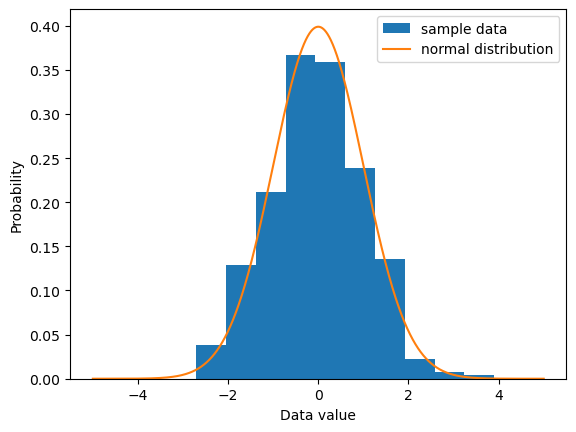

In [5]:
# a theoretical normal distribution
x = np.linspace(-5, 5, 10101)
theNormDist = stats.norm.pdf(x)
# normalize to pdf
#theNormDist = theNormDist*np.mean(np.diff(x))
#theNormDist = theNormDist / np.sum(theNormDist)

#numSamples = 40
numSamples = 400 # more normal
sampleData = np.zeros(numSamples)

for i in range(numSamples):
    sampleData[i] = np.random.randn()

# plot the histogram
plt.hist(sampleData, bins=10, density=True, label='sample data')
plt.plot(x, theNormDist, label='normal distribution')
plt.xlabel('Data value')
plt.ylabel('Probability')
plt.legend()
plt.show()

In [9]:
# show the mean of samples of a known distribution
# generate population data

populationN = 1000000
populationData = np.random.randn(populationN)
populationData = populationData - np.mean(populationData)

# draw random samples from the population
sampleSize = 30

# random indices
sampleIndices = np.random.randint(0, populationN, sampleSize)
samplemean = np.mean(populationData[sampleIndices])
print('Sample mean: ', samplemean)

Sample mean:  0.01763171176149623


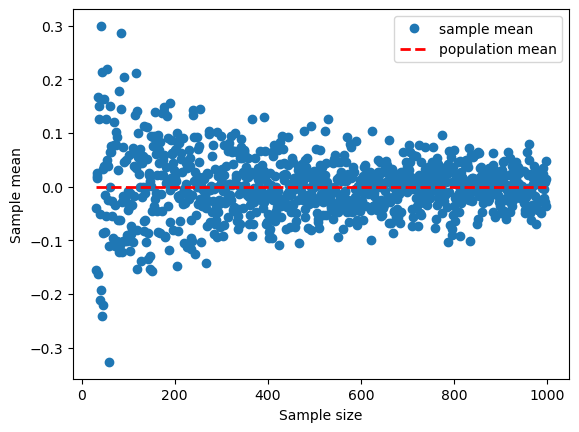

In [10]:
# repeat for different sample sizes

samplesizes = np.arange(30, 1000)

samplemeans = np.zeros(len(samplesizes))

for i in range(len(samplesizes)):
    sampleIndices = np.random.randint(0, populationN, samplesizes[i])
    samplemeans[i] = np.mean(populationData[sampleIndices])


plt.plot(samplesizes, samplemeans, 'o', label='sample mean')
plt.plot(samplesizes[[0,-1]], [np.mean(populationData), np.mean(populationData)], 'r--', linewidth=2, label='population mean')
plt.xlabel('Sample size')
plt.ylabel('Sample mean')
plt.legend()
plt.show()

In [12]:
np.mean(samplemeans[:120])

-0.0030204304662945743